dependencies

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor



data collection and preprocessing

In [51]:
car_dt= pd.read_csv('car data.csv')

In [54]:
car_dt.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


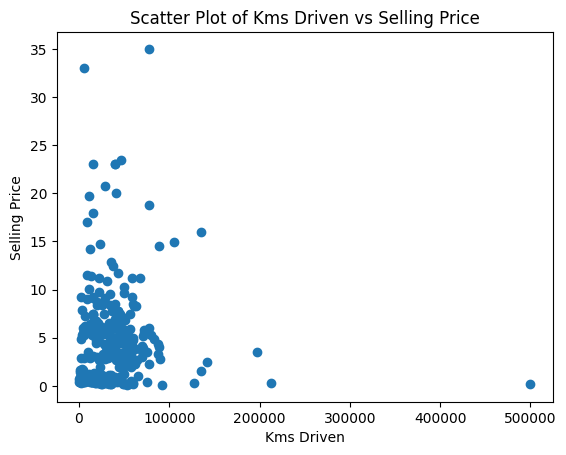

In [56]:
plt.scatter(car_dt['Kms_Driven'], car_dt['Selling_Price'])
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Kms Driven vs Selling Price')
plt.show()


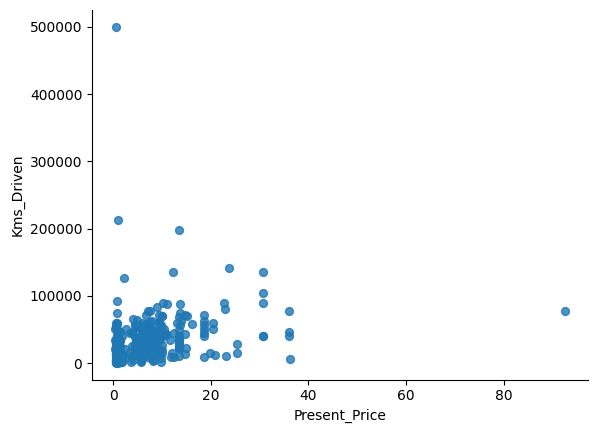

In [53]:
car_dt.plot(kind='scatter', x='Present_Price', y='Kms_Driven', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

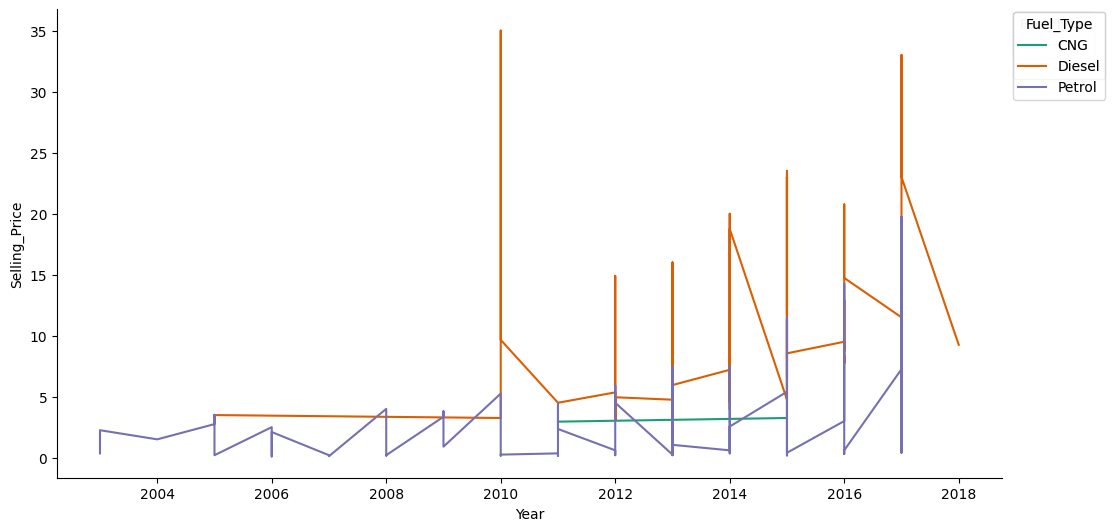

In [58]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Selling_Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = car_dt.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Selling_Price')

In [15]:
car_dt.shape # Display the number of rows and columns

(4340, 8)

In [16]:
car_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [17]:
 car_dt.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


**Distribution of Data Categorically**

In [59]:
print(car_dt.Seller_Type.value_counts())
print(car_dt.Transmission .value_counts())
print(car_dt.Owner.value_counts())
print(car_dt.Fuel_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


**Encoding the data** (since ml model doesnt understand text we turn it to numericals for better understanding)


In [84]:
car_dt.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dt.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dt.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dt.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [85]:
print(car_dt.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


**splitting the data into training and test data**

In [86]:
X=car_dt.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dt['Selling_Price']

In [89]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [88]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting training test data

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

model training

In [91]:
#1.Linear regression
lin_regg_model=LinearRegression()

In [92]:
lin_regg_model.fit(X_train,Y_train)

LinearRegression()

**model evaluation**

In [93]:
training_data_prediction=lin_regg_model.predict(X_train)

In [94]:
#rsquared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score)

R squared error: 0.8799451660493711


**visualize the actual vs predicted prices**

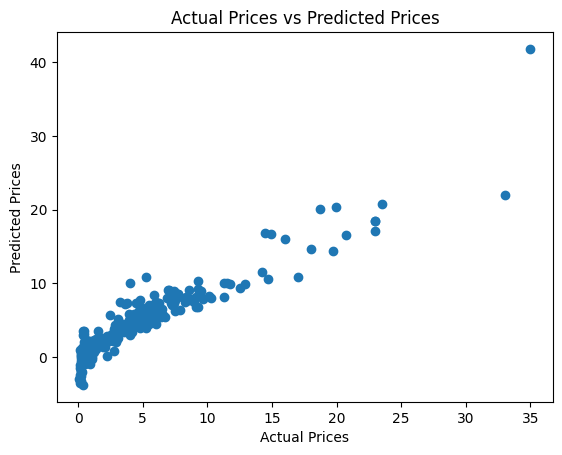

In [35]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

prediction on testing data

In [37]:
testing_data_prediction=lin_regg_model.predict(X_test)
r2_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error:",r2_score)

R squared error: 0.8365766715027051


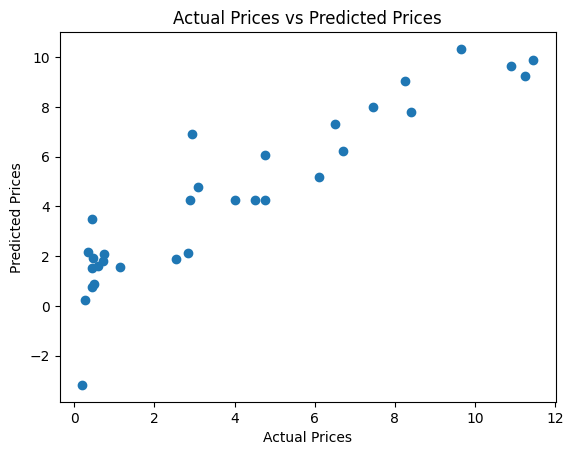

In [39]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Lasso Regression**

In [40]:
lasso_regg_model=Lasso()
lasso_regg_model.fit(X_train,Y_train)

Lasso()

In [42]:
training_data_prediction=lasso_regg_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score)

R squared error: 0.8427856123435794


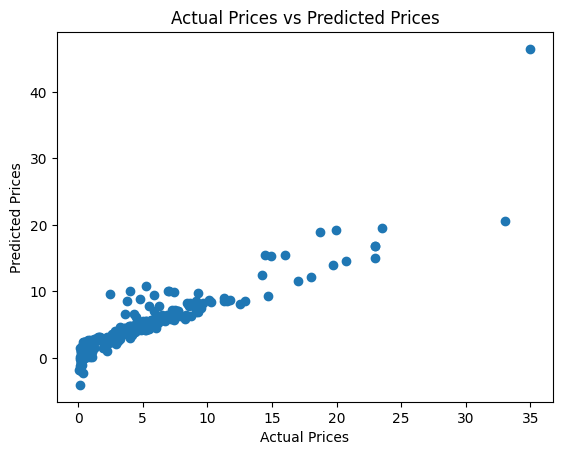

In [43]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [44]:
testing_data_prediction=lasso_regg_model.predict(X_test)
r2_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error:",r2_score)

R squared error: 0.8709167941173195


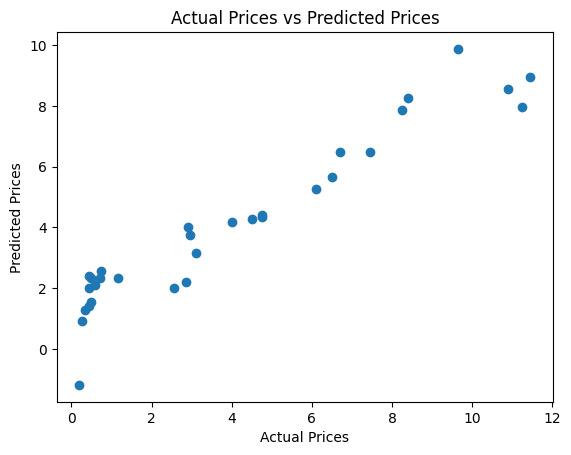

In [45]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

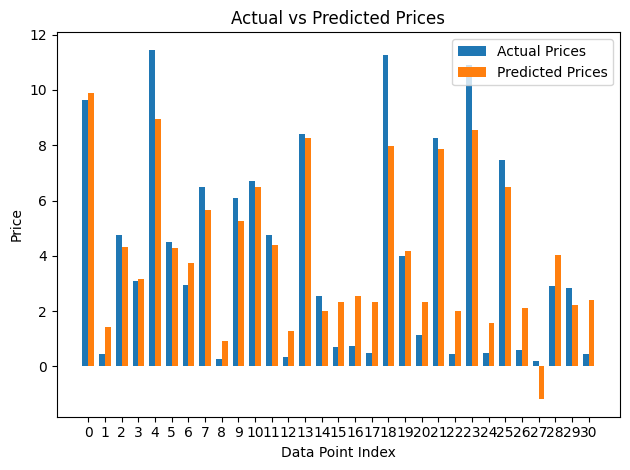

In [72]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(Y_test))
bar_width = 0.35

fig, ax = plt.subplots()
actual_bars = ax.bar(index, Y_test, bar_width, label='Actual Prices')
predicted_bars = ax.bar(index + bar_width, testing_data_prediction, bar_width, label='Predicted Prices')

ax.set_xlabel('Data Point Index')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted Prices')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

plt.tight_layout()
plt.show()


In [56]:
#decision tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, Y_train)
y_pred_tree = decision_tree.predict(X_test)

print(f'Decision Tree RMSE: {mean_squared_error(Y_test, y_pred_tree, squared=False)}')


Decision Tree RMSE: 0.7898836173970555


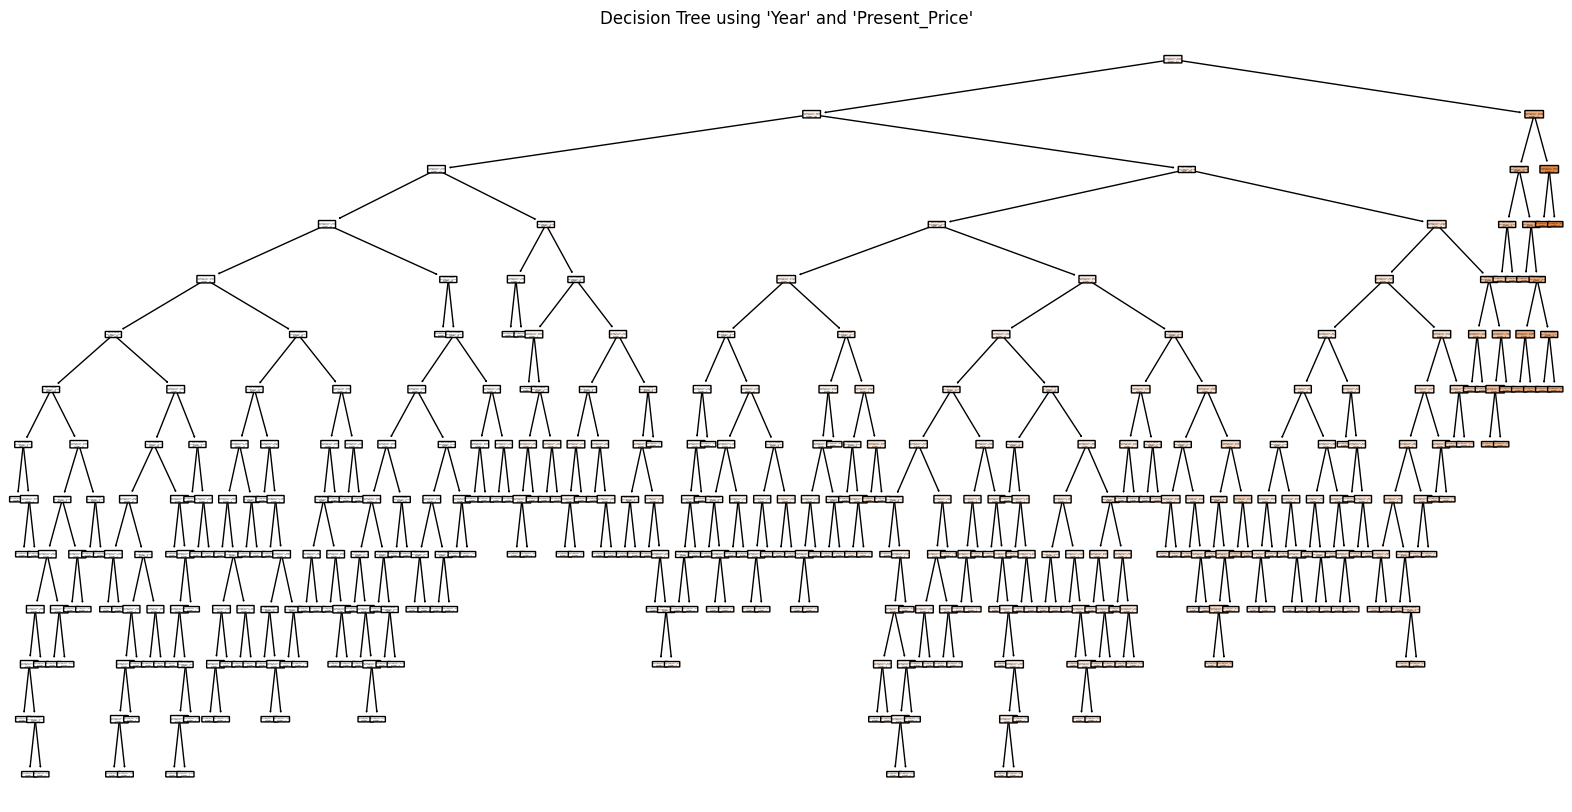

In [65]:
X_train_specific = X_train[['Year', 'Present_Price']]
X_test_specific = X_test[['Year', 'Present_Price']]

decision_tree_specific = DecisionTreeRegressor(random_state=42)
decision_tree_specific.fit(X_train_specific, Y_train)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_specific, filled=True, feature_names=X_train_specific.columns, rounded=True)
plt.title("Decision Tree using 'Year' and 'Present_Price'")
plt.show()


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)

print(f'Random Forest RMSE: {mean_squared_error(Y_test, y_pred_rf, squared=False)}')


Random Forest RMSE: 0.50584263363224


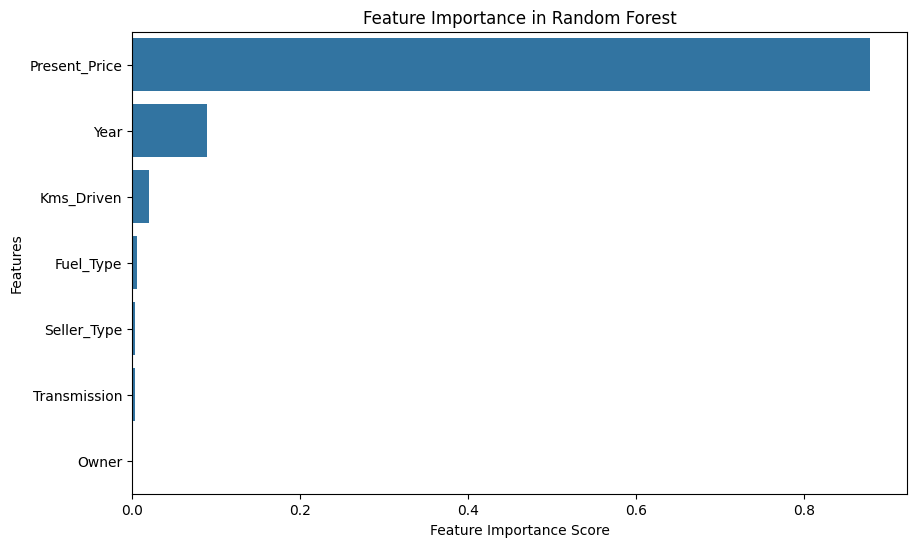

In [66]:
# Feature Importance Plot
feature_importance = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [2]:
!git config --global user.email "AnushkaShital1234@gmail.com"
!git config --global user.name "Anushka@2510"


In [3]:
!git clone https://github.com/AnushkaShital1234/https-AnushkaShital1234-github.com-car-price-prediction.git

Cloning into 'https-AnushkaShital1234-github.com-car-price-prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
